import libraries

In [231]:
import pandas as pd
import re
from sklearn.cluster import KMeans
import seaborn as sns
import numpy as np
import pyproj
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# import data
## substations - all districts

In [232]:
df_pri = pd.read_csv('generation-primary.csv')
df_pri = df_pri.rename(columns=lambda x: re.sub('\ufeff', '', x))
df_pri.head()

,Substation Name,Nominal Voltage (kV),Primary Group,Grid Group,Firm Capacity (MVA),Maximum Load (MVA),Minimum Load (MVA),Generation Connected (MW),Generation Contracted (MW),33kV Overall Category,Overall Category,33kV Generation Capacity,33kV Wider Constraints,HV Reverse Power Flow,HV Generation Capacity,HV Fault Level,HV Wider Constraints,District,X,Y
0,NORTH ROAD,33/11,ABERYSTWYTH T1 / NORTH RD T1 / PARC-Y-LLYN T1 ...,ABERYSTWYTH GT2 / RHYDLYDAN GT1,37.5,18.55,4.64,0.02,0.0,RED,RED,Red,Red,Amber,Green,Red,Amber,Dee Valley & Mid Wales,258666.8910,281901.4070
1,DICKINSONS,33/11,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1,30.0,14.71,3.68,0.04,0.0,RED,RED,Green,Red,Amber,Green,Red,Amber,Merseyside,342713.8240,398255.2320
2,WAVERTREE,33/11,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,GARSTON GT2 / SPEKE GT3 / WAVERTREE GT1A,37.5,18.97,4.74,0.00,0.0,AMBER,RED,Green,Amber,Amber,Green,Red,Amber,Merseyside,339018.8312,388483.6650
3,AINTREE,33/11,AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1,AINTREE GT2 / FAZAKERLEY GT1 / GILLMOSS GT2,20.0,11.67,2.92,0.00,0.0,RED,AMBER,Green,Red,Amber,Amber,Amber,Amber,Merseyside,336740.4480,398306.6880
4,ANDERTON,33/11,ANDERTON T1,HARTFORD GT1 / LOSTOCK GT2 / WINSFORD GT1 / WI...,7.5,2.61,0.65,0.22,0.0,RED,RED,Green,Red,Red,Red,Green,Amber,Mid Cheshire,364880.5897,375727.2788


In [233]:
df_pri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Substation Name             660 non-null    object 
 1   Nominal Voltage (kV)        660 non-null    object 
 2   Primary Group               660 non-null    object 
 3   Grid Group                  660 non-null    object 
 4   Firm Capacity (MVA)         660 non-null    float64
 5   Maximum Load (MVA)          660 non-null    float64
 6   Minimum Load (MVA)          660 non-null    float64
 7   Generation Connected (MW)   660 non-null    float64
 8   Generation Contracted (MW)  660 non-null    float64
 9   33kV Overall Category       660 non-null    object 
 10  Overall Category            660 non-null    object 
 11  33kV Generation Capacity    660 non-null    object 
 12  33kV Wider Constraints      660 non-null    object 
 13  HV Reverse Power Flow       660 non

In [234]:
df_pri['max_load/cap'] = df_pri['Maximum Load (MVA)'] / df_pri['Firm Capacity (MVA)']
df_pri.groupby(['District', 'Overall Category', 'Nominal Voltage (kV)'])[['Substation Name', 'Firm Capacity (MVA)', 'Maximum Load (MVA)', 'max_load/cap', 'Generation Connected (MW)', 'Generation Contracted (MW)']].agg({'Substation Name':'count', 'Firm Capacity (MVA)':'sum', 'Maximum Load (MVA)':'sum', 'max_load/cap':'mean', 'Generation Connected (MW)':'sum', 'Generation Contracted (MW)':'sum'}).reset_index().rename(columns={'Substation Name':'Count'})

,District,Overall Category,Nominal Voltage (kV),Count,Firm Capacity (MVA),Maximum Load (MVA),max_load/cap,Generation Connected (MW),Generation Contracted (MW)
0,Dee Valley & Mid Wales,AMBER,33/11,53,438.47,243.27,0.552465,44.31,0.48
1,Dee Valley & Mid Wales,RED,33/11,55,1140.54,635.69,0.573654,114.36,13.55
2,Merseyside,AMBER,33/11,29,515.59,260.65,0.508462,0.00,0.00
3,Merseyside,RED,33/11,141,4417.00,2299.53,0.521566,161.19,13.84
4,Merseyside,RED,33/6.3,39,576.30,303.06,0.517203,3.50,0.00
5,Merseyside,RED,33/6.6,19,254.80,160.84,0.694592,0.00,0.00
6,Mid Cheshire,AMBER,33/11,31,335.55,185.81,0.574240,1.14,1.00
7,Mid Cheshire,RED,33/11,71,1695.04,935.32,0.574882,82.29,20.08
8,Mid Cheshire,RED,33/6.3,2,18.20,1.94,0.106593,0.00,0.00
9,North Wales,AMBER,33/11,57,577.94,258.92,0.451132,26.94,5.00


In [235]:
df_grid = pd.read_csv('generation-grid.csv')
df_grid = df_grid.rename(columns=lambda x: re.sub('\ufeff', '', x)) # remove blank spaces
df_grid.head()

,Substation Name,Nominal Voltage (kV),Grid Group,Supergrid Group,Firm Capacity (MVA),Maximum Load (MVA),Minimum Load (MVA),Generation Connected (MW),Generation Contracted (MW),Overall Category,132kV Generation Capacity,33kV Fault Level,Wider Constraint Category,Wider Constraint,District,X,Y
0,AINTREE,132/33,AINTREE GT1 / FORMBY GT2A / LITHERLAND GT1B,KIRKBY,101.9,76.7,19.2,6.1,16.0,RED,Green,Green,Red,NaN,Merseyside,337138.3940,399769.6970
1,FORMBY,132/33,AINTREE GT1 / FORMBY GT2A / LITHERLAND GT1B,KIRKBY,101.9,76.7,19.2,6.1,16.0,RED,Green,Green,Red,NaN,Merseyside,330979.9800,406990.7280
2,LISTER DRIVE,132/33,BOOTLE GT2A / BURLINGTON ST GT1 / LISTER DV A GT2,LISTER DRIVE,138.1,85.6,21.4,5.4,20.4,AMBER,Green,Red,Amber,NaN,Merseyside,338447.3411,391747.9437
3,LEGACY,132/33,BRYMBO GT1 / LEGACY LOCAL GT1 / MARCHWIEL GT1 ...,LEGACY,154.7,119.7,29.9,28.9,48.0,RED,Green,Green,Red,NaN,Dee Valley & Mid Wales,329112.9340,347936.9270
4,WARRINGTON,132/33,DALLAM GT1 / SANKEY BRIDGES GT1 / WARRINGTON GT3,CARRINGTON - FIDDLERS FERRY,103.0,92.7,23.2,11.2,5.4,RED,Green,Green,Red,NaN,Mid Cheshire,362284.6170,388088.3560


In [236]:
df_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Substation Name             104 non-null    object 
 1   Nominal Voltage (kV)        104 non-null    object 
 2   Grid Group                  104 non-null    object 
 3   Supergrid Group             104 non-null    object 
 4   Firm Capacity (MVA)         104 non-null    float64
 5   Maximum Load (MVA)          104 non-null    float64
 6   Minimum Load (MVA)          104 non-null    float64
 7   Generation Connected (MW)   104 non-null    float64
 8   Generation Contracted (MW)  104 non-null    float64
 9   Overall Category            104 non-null    object 
 10  132kV Generation Capacity   104 non-null    object 
 11  33kV Fault Level            104 non-null    object 
 12  Wider Constraint Category   104 non-null    object 
 13  Wider Constraint            0 non-n

In [237]:
df_grid['max_load/cap'] = df_grid['Maximum Load (MVA)'] / df_grid['Firm Capacity (MVA)']
df_grid.groupby(['District', 'Overall Category'])[['Substation Name', 'Firm Capacity (MVA)', 'Maximum Load (MVA)', 'max_load/cap', 'Generation Connected (MW)', 'Generation Contracted (MW)']].agg({'Substation Name':'count', 'Firm Capacity (MVA)':'sum', 'Maximum Load (MVA)':'sum', 'max_load/cap':'mean', 'Generation Connected (MW)':'sum', 'Generation Contracted (MW)':'sum'}).reset_index().rename(columns={'Substation Name':'Count'})

,District,Overall Category,Count,Firm Capacity (MVA),Maximum Load (MVA),max_load/cap,Generation Connected (MW),Generation Contracted (MW)
0,Dee Valley & Mid Wales,RED,16,2077.1,1414.6,0.704732,1199.7,336.3
1,Merseyside,AMBER,11,1463.1,895.1,0.607819,147.7,119.6
2,Merseyside,RED,28,2378.8,1619.3,0.666007,551.4,231.4
3,Mid Cheshire,RED,14,1637.2,1167.0,0.737279,513.4,475.7
4,North Wales,AMBER,4,284.2,222.4,0.784914,400.8,118.6
5,North Wales,RED,8,769.9,551.0,0.705889,480.8,158.5
6,Wirral,RED,23,2175.9,1549.0,0.708889,757.4,915.2


In [238]:
df_sup = pd.read_csv('generation-supergrid.csv')
df_sup = df_sup.rename(columns=lambda x: re.sub('\ufeff', '', x))
df_sup.head()

,Substation Name,Nominal Voltage (kV),Supergrid Group,Generation Connected (MW),Generation Contracted (MW),Overall Category,District,X,Y
0,CUERDLEY,275/132,CARRINGTON - FIDDLERS FERRY,319.86,201.82,RED,Merseyside,354276.1256,386149.3722
1,ST ASAPH,400/132,CONNAHS QUAY - PENTIR - ST ASAPH,399.18,470.42,RED,North Wales,302107.1498,374226.2423
2,TRAWSFYNYDD,275/132,TRAWSFYNYDD,114.92,5.11,AMBER,North Wales,268965.1300,338612.7790
3,BIRKENHEAD,275/132,BIRKENHEAD,147.16,279.62,RED,Wirral,329447.9271,386080.0892
4,FRODSHAM,275/132,FRODSHAM - INCE,305.61,1264.77,RED,Wirral,352273.0660,379450.7070


In [239]:
df_sup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Substation Name             15 non-null     object 
 1   Nominal Voltage (kV)        15 non-null     object 
 2   Supergrid Group             15 non-null     object 
 3   Generation Connected (MW)   15 non-null     float64
 4   Generation Contracted (MW)  15 non-null     float64
 5   Overall Category            15 non-null     object 
 6   District                    15 non-null     object 
 7   X                           15 non-null     float64
 8   Y                           15 non-null     float64
dtypes: float64(4), object(5)
memory usage: 1.2+ KB


In [240]:
df_sup.groupby(['District', 'Overall Category'])[['Substation Name', 'Generation Connected (MW)', 'Generation Contracted (MW)']].agg({'Substation Name':'count', 'Generation Connected (MW)':'sum', 'Generation Contracted (MW)':'sum'}).reset_index().rename(columns={'Substation Name':'Count'})

,District,Overall Category,Count,Generation Connected (MW),Generation Contracted (MW)
0,Dee Valley & Mid Wales,RED,2,741.11,787.71
1,Merseyside,AMBER,1,54.16,49.60
2,Merseyside,RED,3,604.56,496.57
3,Mid Cheshire,RED,1,26.65,125.72
4,North Wales,AMBER,2,253.17,59.31
5,North Wales,RED,2,798.36,940.84
6,Wirral,RED,4,860.41,3928.57


## substations - Merseyside

In [241]:
df_pri_m = df_pri[df_pri['District'] == 'Merseyside']
df_pri_m = df_pri_m.replace('', np.nan)
df_pri_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 650
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Substation Name             228 non-null    object 
 1   Nominal Voltage (kV)        228 non-null    object 
 2   Primary Group               228 non-null    object 
 3   Grid Group                  228 non-null    object 
 4   Firm Capacity (MVA)         228 non-null    float64
 5   Maximum Load (MVA)          228 non-null    float64
 6   Minimum Load (MVA)          228 non-null    float64
 7   Generation Connected (MW)   228 non-null    float64
 8   Generation Contracted (MW)  228 non-null    float64
 9   33kV Overall Category       228 non-null    object 
 10  Overall Category            228 non-null    object 
 11  33kV Generation Capacity    228 non-null    object 
 12  33kV Wider Constraints      228 non-null    object 
 13  HV Reverse Power Flow       228 non

In [242]:
df_grid_m = df_grid[df_grid['District'] == 'Merseyside']
df_grid_m = df_grid_m.replace('', np.nan)
df_grid_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 0 to 102
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Substation Name             39 non-null     object 
 1   Nominal Voltage (kV)        39 non-null     object 
 2   Grid Group                  39 non-null     object 
 3   Supergrid Group             39 non-null     object 
 4   Firm Capacity (MVA)         39 non-null     float64
 5   Maximum Load (MVA)          39 non-null     float64
 6   Minimum Load (MVA)          39 non-null     float64
 7   Generation Connected (MW)   39 non-null     float64
 8   Generation Contracted (MW)  39 non-null     float64
 9   Overall Category            39 non-null     object 
 10  132kV Generation Capacity   39 non-null     object 
 11  33kV Fault Level            39 non-null     object 
 12  Wider Constraint Category   39 non-null     object 
 13  Wider Constraint            0 non-nu

In [243]:
df_sup_m = df_sup[df_sup['District'] == 'Merseyside']
df_sup_m = df_sup_m.replace('', np.nan)
df_sup_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 0 to 13
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Substation Name             4 non-null      object 
 1   Nominal Voltage (kV)        4 non-null      object 
 2   Supergrid Group             4 non-null      object 
 3   Generation Connected (MW)   4 non-null      float64
 4   Generation Contracted (MW)  4 non-null      float64
 5   Overall Category            4 non-null      object 
 6   District                    4 non-null      object 
 7   X                           4 non-null      float64
 8   Y                           4 non-null      float64
dtypes: float64(4), object(5)
memory usage: 320.0+ bytes


In [244]:
df_pri_m.groupby('Overall Category')[['Maximum Load (MVA)', 'Firm Capacity (MVA)', 'Generation Connected (MW)', 'Generation Contracted (MW)']].agg(['count', 'sum', 'mean', 'max'])

Maximum Load (MVA)                             \
                              count      sum       mean    max   
Overall Category                                                 
AMBER                            29   260.65   8.987931  16.20   
RED                             199  2763.43  13.886583  24.89   

                 Firm Capacity (MVA)                            \
                               count      sum       mean   max   
Overall Category                                                 
AMBER                             29   515.59  17.778966  20.0   
RED                              199  5248.10  26.372362  37.5   

                 Generation Connected (MW)                         \
                                     count     sum      mean  max   
Overall Category                                                    
AMBER                                   29    0.00  0.000000  0.0   
RED                                    199  164.69  0.827588  4.6   

                 Generation Contracted (MW)                        
                                      count    sum      mean  max  
Overall Category                                                   
AMBER                                    29   0.00  0.000000  0.0  
RED                                     199  13.84  0.069548  3.0

In [245]:
df_grid_m.groupby('Overall Category')[['Maximum Load (MVA)', 'Firm Capacity (MVA)', 'Generation Connected (MW)', 'Generation Contracted (MW)']].agg(['count', 'sum', 'mean', 'max'])

Maximum Load (MVA)                           \
                              count     sum       mean   max   
Overall Category                                               
AMBER                            11   895.1  81.372727  94.5   
RED                              28  1619.3  57.832143  87.2   

                 Firm Capacity (MVA)                             \
                               count     sum        mean    max   
Overall Category                                                  
AMBER                             11  1463.1  133.009091  139.0   
RED                               28  2378.8   84.957143  114.8   

                 Generation Connected (MW)                          \
                                     count    sum       mean   max   
Overall Category                                                     
AMBER                                   11  147.7  13.427273  27.0   
RED                                     28  551.4  19.692857  57.3   

                 Generation Contracted (MW)                          
                                      count    sum       mean   max  
Overall Category                                                     
AMBER                                    11  119.6  10.872727  29.2  
RED                                      28  231.4   8.264286  22.0

In [246]:
df_sup_m.groupby('Overall Category')[['Generation Connected (MW)', 'Generation Contracted (MW)']].agg(['count', 'sum'])

Generation Connected (MW)         Generation Contracted (MW)  \
                                     count     sum                      count   
Overall Category                                                                
AMBER                                    1   54.16                          1   
RED                                      3  604.56                          3   

                          
                     sum  
Overall Category          
AMBER              49.60  
RED               496.57

In [247]:
df_sub = pd.concat([df_pri_m[['Substation Name', 'Primary Group', 'Firm Capacity (MVA)', 'Maximum Load (MVA)', 'Overall Category', 'X', 'Y']].rename(columns={'Primary Group':'Grid Group'}), df_grid_m[['Substation Name', 'Grid Group', 'Firm Capacity (MVA)', 'Maximum Load (MVA)', 'Overall Category', 'X', 'Y']]], ignore_index=True)
df_sub.head()

,Substation Name,Grid Group,Firm Capacity (MVA),Maximum Load (MVA),Overall Category,X,Y
0,DICKINSONS,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,14.71,RED,342713.8240,398255.232
1,WAVERTREE,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,37.5,18.97,RED,339018.8312,388483.665
2,AINTREE,AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1,20.0,11.67,AMBER,336740.4480,398306.688
3,WAVERTREE VALE,ARUNDEL T1 / GROVE PK T1 / WAVERTREE VALE T1,17.5,10.12,RED,337981.9520,389512.576
4,LARK LANE,BEAUMONT ST T1 / DINGLE VALE T1 / LARK LA T1 /...,30.0,20.86,RED,337278.9120,387620.384


### convert bng to lat long

In [248]:
transformer = pyproj.Transformer.from_crs("EPSG:27700", "EPSG:4326")

df_pri_m['long'] = df_pri_m['X'].apply(lambda x: transformer.transform(x, 0)[1]) - 0.07
df_pri_m['lat'] = df_pri_m['Y'].apply(lambda x:  transformer.transform(0, x)[0]) + 0.15

df_grid_m['long'] = df_grid_m['X'].apply(lambda x: transformer.transform(x, 0)[1]) - 0.07
df_grid_m['lat'] = df_grid_m['Y'].apply(lambda x:  transformer.transform(0, x)[0]) + 0.15

df_sup_m['long'] = df_sup_m['X'].apply(lambda x: transformer.transform(x, 0)[1]) - 0.07
df_sup_m['lat'] = df_sup_m['Y'].apply(lambda x:  transformer.transform(0, x)[0]) + 0.15

df_sub['long'] = df_sub['X'].apply(lambda x: transformer.transform(x, 0)[1]) - 0.07
df_sub['lat'] = df_sub['Y'].apply(lambda x:  transformer.transform(0, x)[0]) + 0.15

### plot map

In [249]:
fig = px.scatter_mapbox(df_pri_m, lat='lat', lon='long', zoom=8.5,
                        center=dict(lat=53.5, lon=-2.9), hover_name='Substation Name',
                        mapbox_style='open-street-map', color='Nominal Voltage (kV)')
fig.show()

In [250]:
fig = px.density_mapbox(df_pri_m.replace({'RED':2, 'AMBER':1}), lat='lat', lon='long', z='Overall Category', radius=15,
                        center=dict(lat=53.5, lon=-2.9), zoom=8.5, hover_name='Substation Name',
                        mapbox_style="open-street-map")

fig.add_trace(go.Scattermapbox(lat=df_pri_m['lat'], lon=df_pri_m['long'], mode='markers', showlegend=False, hoverinfo='skip',
                               marker={'color':df_pri_m['Overall Category'].replace({'RED':2, 'AMBER':1}), 'size':8}))

fig.show()

In [251]:
fig = px.density_mapbox(df_grid_m.replace({'RED':2, 'AMBER':1}), lat='lat', lon='long', z='Overall Category', radius=15,
                        center=dict(lat=53.5, lon=-2.9), zoom=8.5, hover_name='Substation Name',
                        mapbox_style="open-street-map")
fig.add_trace(go.Scattermapbox(lat=df_grid_m['lat'], lon=df_grid_m['long'], mode='markers', showlegend=False, hoverinfo='skip',
                               marker={'color':df_grid_m['Overall Category'].replace({'RED':2, 'AMBER':1}), 'size':8}))
fig.show()

In [252]:
fig = px.density_mapbox(df_sup_m.replace({'RED':2, 'AMBER':1}), lat='lat', lon='long', z='Overall Category', radius=20,
                        center=dict(lat=53.5, lon=-2.9), zoom=8.5, hover_name='Substation Name',
                        mapbox_style="open-street-map")
# fix missing data point of 1 category by adding trace (similar to scattermapbox)
fig.add_trace(go.Scattermapbox(lat=df_sup_m['lat'], lon=df_sup_m['long'], mode='markers', showlegend=False, hoverinfo='skip',
                               marker={'color':df_sup_m['Overall Category'].replace({'RED':2, 'AMBER':1}), 'size':10}))
fig.show()

## flows

In [253]:
df_flow = pd.read_parquet('flow.parquet')
df_flow.head()

,timestamp,time_zone_offset,net_mw,net_amps,net_mvar,filter_mw,filter_amp,filter_mvar,filtered_manual_int,generation_output_mw,underlying_demand_mw,group_id,service_area,district,group_name,voltage
0,2023-12-30 05:30:00,0,4.410,0.0,0.609,NaN,NaN,NaN,None,0.0,4.410,91025,SPM,Merseyside,ATHOL ST T1 / CHISENHALE ST T1 / SANDHILLS LA T1,HV
1,2023-12-30 06:00:00,0,4.398,0.0,0.609,NaN,NaN,NaN,None,0.0,4.398,91025,SPM,Merseyside,ATHOL ST T1 / CHISENHALE ST T1 / SANDHILLS LA T1,HV
2,2023-12-30 06:30:00,0,4.323,0.0,0.149,NaN,NaN,NaN,None,0.0,4.323,91025,SPM,Merseyside,ATHOL ST T1 / CHISENHALE ST T1 / SANDHILLS LA T1,HV
3,2023-12-30 07:00:00,0,4.323,0.0,0.141,NaN,NaN,NaN,None,0.0,4.323,91025,SPM,Merseyside,ATHOL ST T1 / CHISENHALE ST T1 / SANDHILLS LA T1,HV
4,2023-12-30 07:30:00,0,4.481,0.0,0.117,NaN,NaN,NaN,None,0.0,4.481,91025,SPM,Merseyside,ATHOL ST T1 / CHISENHALE ST T1 / SANDHILLS LA T1,HV


In [254]:
df_flow_m = df_flow.query('district == "Merseyside"').replace('', np.nan)
df_flow_m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1623175 entries, 0 to 1623174
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   timestamp             1623175 non-null  datetime64[ns]
 1   time_zone_offset      1623175 non-null  int64         
 2   net_mw                1623175 non-null  float64       
 3   net_amps              1623175 non-null  float64       
 4   net_mvar              1623175 non-null  float64       
 5   filter_mw             216031 non-null   float64       
 6   filter_amp            216031 non-null   float64       
 7   filter_mvar           216031 non-null   float64       
 8   filtered_manual_int   107867 non-null   object        
 9   generation_output_mw  1623175 non-null  float64       
 10  underlying_demand_mw  1623175 non-null  float64       
 11  group_id              1623175 non-null  object        
 12  service_area          1623175 non-null  ob

In [255]:
df_flow_m['timestamp'].agg(['min', 'max'])

min   2023-09-01 01:30:00
max   2024-09-08 04:00:00
Name: timestamp, dtype: datetime64[ns]

In [256]:
df_flow_m[['net_mw', 'underlying_demand_mw']].sum()

net_mw                  2.453140e+07
underlying_demand_mw    2.704555e+07
dtype: float64

### KPIs

In [257]:
df_flow_m['date'] = pd.to_datetime(df_flow_m['timestamp'].dt.date)
df_flow_m['time'] = df_flow_m['timestamp'].dt.time

#### half-hourly

In [258]:
df_flow_hr = df_flow_m.groupby('time')['underlying_demand_mw'].mean().reset_index()
df_flow_hr

,time,underlying_demand_mw
0,00:00:00,15.052279
1,00:30:00,14.598988
2,01:00:00,14.035200
3,01:30:00,13.736485
4,02:00:00,13.389943
5,02:30:00,13.186770
6,03:00:00,12.768177
7,03:30:00,12.642261
8,04:00:00,11.807121
9,04:30:00,12.408647


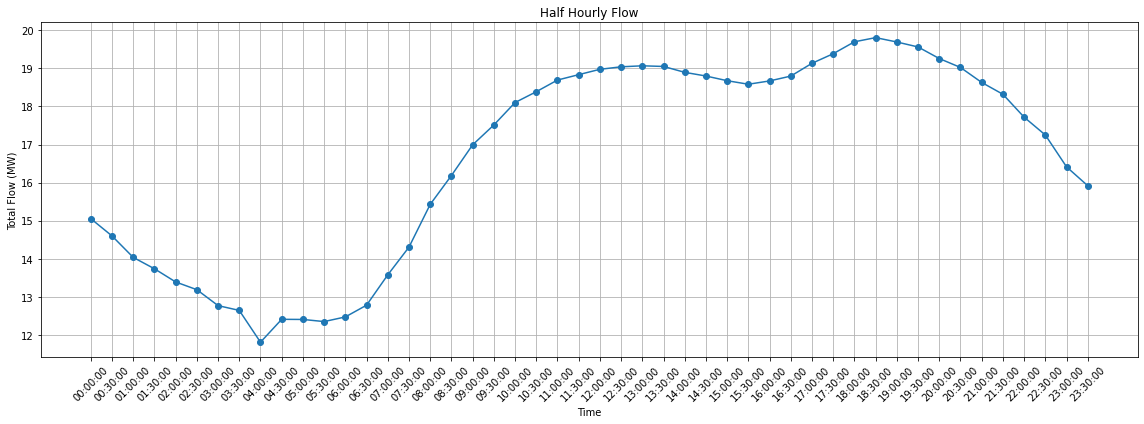

In [259]:
plt.figure(figsize=(16, 6))  # Set plot size
plt.plot(df_flow_hr['time'].astype('str'), df_flow_hr['underlying_demand_mw'], marker='o')
plt.xlabel('Time')
plt.ylabel('Total Flow (MW)')
plt.title('Half Hourly Flow')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

#### Daily

In [260]:
df_flow_dm = df_flow_m.groupby('date')['underlying_demand_mw'].agg(['max','min']).reset_index()
df_flow_dm

,date,max,min
0,2023-09-01,230.777,0.000
1,2023-09-02,213.173,0.000
2,2023-09-03,225.336,0.000
3,2023-09-04,240.286,0.000
4,2023-09-05,251.199,0.000
...,...,...,...
369,2024-09-04,240.851,0.000
370,2024-09-05,237.311,0.000
371,2024-09-06,224.345,0.000
372,2024-09-07,206.432,0.000


In [261]:
df_flow_dl = df_flow_m.groupby('date')['underlying_demand_mw'].sum().reset_index()
df_flow_dl['day'] = df_flow_dl['date'].dt.day_name()
df_flow_dl = df_flow_dl.groupby('day').mean().reset_index()
# fix day order
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_flow_dl['day'] = pd.Categorical(df_flow_dl['day'], categories=day_order, ordered=True)
df_flow_dl = df_flow_dl.sort_values('day')
df_flow_dl

,day,underlying_demand_mw
1,Monday,73357.682302
5,Tuesday,74740.576962
6,Wednesday,75221.685623
4,Thursday,74703.813943
0,Friday,72948.340889
2,Saturday,69304.351685
3,Sunday,66086.039037


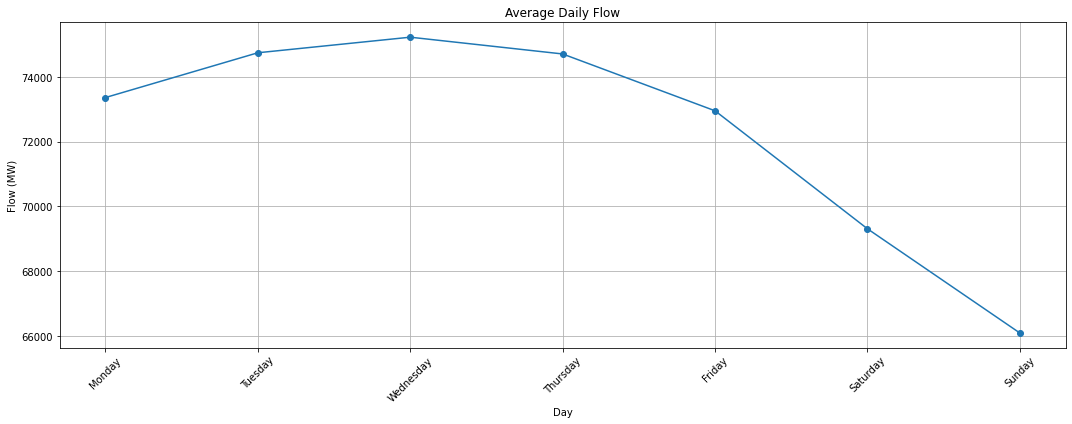

In [262]:
plt.figure(figsize=(15, 6))
plt.plot(df_flow_dl['day'], df_flow_dl['underlying_demand_mw'], marker='o')
plt.xlabel('Day')
plt.ylabel('Flow (MW)')
plt.title('Average Daily Flow')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Weekly

In [263]:
df_flow_wk = df_flow_m.resample('W-THU', on='date')['underlying_demand_mw'].sum().reset_index()
df_flow_wk

,date,underlying_demand_mw
0,2023-09-07,476668.815
1,2023-09-14,475369.843
2,2023-09-21,461524.482
3,2023-09-28,468199.587
4,2023-10-05,485195.626
5,2023-10-12,490623.364
6,2023-10-19,562384.363
7,2023-10-26,554828.700
8,2023-11-02,548257.900
9,2023-11-09,534512.294


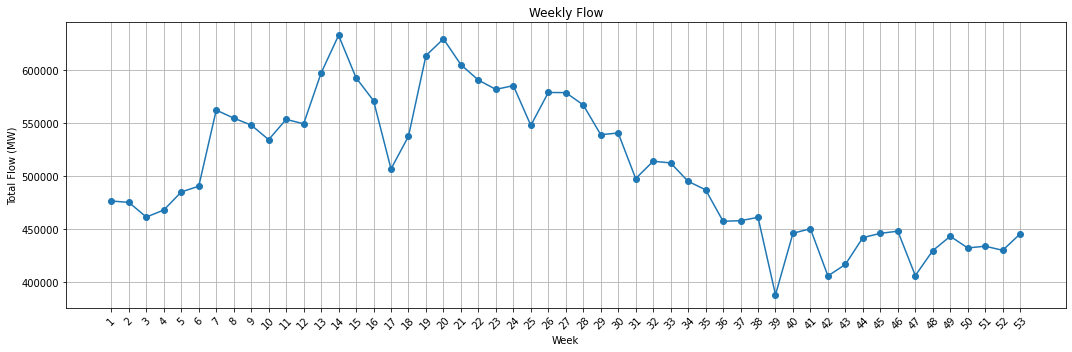

In [264]:
plt.figure(figsize=(15, 5))
plt.plot(df_flow_wk.index[:-1] + 1, df_flow_wk['underlying_demand_mw'][:-1], marker='o') # cut last week as not full 7 days
plt.xlabel('Week')
plt.ylabel('Total Flow (MW)')
plt.title('Weekly Flow')
plt.xticks(df_flow_wk.index[:-1] + 1, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Monthly

In [265]:
df_flow_ml = df_flow_m.resample('M', on='date')['underlying_demand_mw'].sum().reset_index().assign(month = lambda x:x.date.dt.month_name() + '-' + x.date.astype(str).str[:4])
df_flow_ml

,date,underlying_demand_mw,month
0,2023-09-30,2014541.914,September-2023
1,2023-10-31,2336367.479,October-2023
2,2023-11-30,2407081.253,November-2023
3,2023-12-31,2525206.691,December-2023
4,2024-01-31,2667215.128,January-2024
5,2024-02-29,2382663.565,February-2024
6,2024-03-31,2427345.174,March-2024
7,2024-04-30,2169580.094,April-2024
8,2024-05-31,1964710.552,May-2024
9,2024-06-30,1836110.774,June-2024


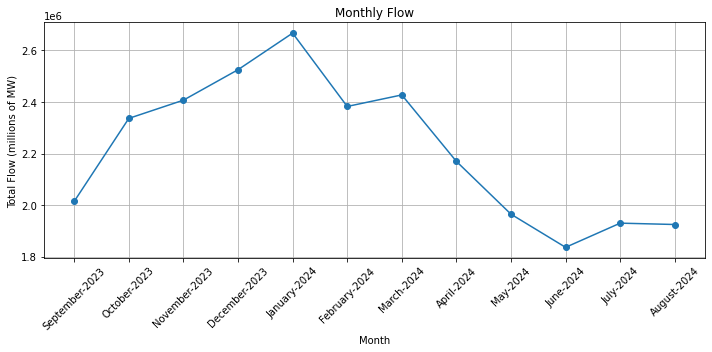

In [266]:
plt.figure(figsize=(10, 5))  # Set plot size
plt.plot(df_flow_ml['month'][:-1], df_flow_ml['underlying_demand_mw'][:-1], marker='o') # cut last month as not full 30 days
plt.xlabel('Month')
plt.ylabel('Total Flow (millions of MW)')
plt.title('Monthly Flow')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()
plt.show()

# Cluster to find grid group centres

In [267]:
for gg in df_sub['Grid Group'].unique():
    df = df_sub.query('`Grid Group` == "' + gg + '"')[['lat', 'long']]
    kmeans = KMeans(n_clusters=1)
    kmeans.fit(df)
    df_sub.loc[df_sub['Grid Group'] == gg, 'lat_group'] = kmeans.cluster_centers_[0][0]
    df_sub.loc[df_sub['Grid Group'] == gg, 'long_group'] = kmeans.cluster_centers_[0][1]
df_sub['distance'] = ((df_sub['lat'] - df_sub['lat_group']) **2 + (df_sub['long'] - df_sub['long_group']) **2) **0.5 # euclidean distance
# df_sub.to_excel('gg.xlsx', index=False)
df_sub.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` 

,Substation Name,Grid Group,Firm Capacity (MVA),Maximum Load (MVA),Overall Category,X,Y,long,lat,lat_group,long_group,distance
0,DICKINSONS,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,14.71,RED,342713.8240,398255.232,-2.868960,53.479467,53.484225,-2.859639,0.010465
1,WAVERTREE,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,37.5,18.97,RED,339018.8312,388483.665,-2.920402,53.392115,53.378845,-2.920549,0.013271
2,AINTREE,AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1,20.0,11.67,AMBER,336740.4480,398306.688,-2.952121,53.479927,53.482212,-2.940717,0.011630
3,WAVERTREE VALE,ARUNDEL T1 / GROVE PK T1 / WAVERTREE VALE T1,17.5,10.12,RED,337981.9520,389512.576,-2.934837,53.401313,53.395105,-2.936518,0.006432
4,LARK LANE,BEAUMONT ST T1 / DINGLE VALE T1 / LARK LA T1 /...,30.0,20.86,RED,337278.9120,387620.384,-2.944624,53.384398,53.389567,-2.958804,0.015092


# flow - substations
match capacity (MVA) with flow (MW)

In [268]:
# define helper function as method to flatten grouped columns
def __my_flatten_cols(self, how="_", reset_index=True):
    if isinstance(self.columns, pd.MultiIndex):
        self.columns = [how.join(c_name) for c_name in self.columns.values]
    return self.reset_index() if reset_index else self
pd.DataFrame.my_flatten_cols = __my_flatten_cols
df_flow_sub = df_flow_m.groupby('group_name')[['net_mw', 'generation_output_mw', 'underlying_demand_mw']].agg(['mean', 'max'])
df_flow_sub = df_flow_sub.my_flatten_cols()
df_flow_sub

,group_name,net_mw_mean,net_mw_max,generation_output_mw_mean,generation_output_mw_max,underlying_demand_mw_mean,underlying_demand_mw_max
0,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,8.105243,15.288,0.000000,0.0,8.105243,15.288
1,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,9.724854,20.424,0.000000,0.0,9.724854,20.424
2,AINSDALE T1 / PINFOLD LA T1,2.467226,5.668,0.000000,0.0,2.467226,5.668
3,AINTREE GT1 / FORMBY GT2A / LITHERLAND GT1B,26.751864,48.584,0.000000,0.0,26.751864,48.584
4,AINTREE GT2 / FAZAKERLEY GT1 / GILLMOSS GT2,30.095884,65.356,0.000000,0.0,30.095884,65.356
...,...,...,...,...,...,...,...
86,Paddington Place T1 / Paddington Place T2,0.085609,0.086,0.000000,0.0,0.085609,0.086
87,RAINHILL,183.204562,314.235,-31.569335,-0.0,214.773897,331.875
88,RAVENHEAD G1A1 / ST HELENS GT1 / WINDLE GT1,19.364394,39.394,-11.700000,-11.7,31.064394,51.094
89,ROYAL INSURANCE (NEW QUAY) T1 / ROYAL INSURANC...,0.261790,0.455,0.000000,0.0,0.261790,0.455


In [269]:
df_flow_gg = pd.merge(df_sub[['Grid Group', 'lat_group', 'long_group']].drop_duplicates(subset='Grid Group'), df_flow_sub, 'left', left_on='Grid Group', right_on='group_name')
df_flow_gg.to_excel('flow_gg.xlsx', index=False)
df_flow_gg.head()

,Grid Group,lat_group,long_group,group_name,net_mw_mean,net_mw_max,generation_output_mw_mean,generation_output_mw_max,underlying_demand_mw_mean,underlying_demand_mw_max
0,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,53.484225,-2.859639,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,8.105243,15.288,0.0,0.0,8.105243,15.288
1,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,53.378845,-2.920549,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,9.724854,20.424,0.0,0.0,9.724854,20.424
2,AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1,53.482212,-2.940717,AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1,5.834762,38.009,0.0,0.0,5.834762,38.009
3,ARUNDEL T1 / GROVE PK T1 / WAVERTREE VALE T1,53.395105,-2.936518,ARUNDEL T1 / GROVE PK T1 / WAVERTREE VALE T1,5.486079,11.504,0.0,0.0,5.486079,11.504
4,BEAUMONT ST T1 / DINGLE VALE T1 / LARK LA T1 /...,53.389567,-2.958804,BEAUMONT ST T1 / DINGLE VALE T1 / LARK LA T1 /...,10.689578,19.826,0.0,0.0,10.689578,19.826


## substation not in flow

In [270]:
df_sub_miss = df_flow_gg[df_flow_gg['group_name'].isna()]
df_sub_miss.to_excel('sub_no_flow.xlsx', index=False)
df_sub_miss

,Grid Group,lat_group,long_group,group_name,net_mw_mean,net_mw_max,generation_output_mw_mean,generation_output_mw_max,underlying_demand_mw_mean,underlying_demand_mw_max
13,DELAMORE ST T1 / KIRKDALE T1 / WALTON T1,53.442105,-2.969258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,CLUBMOOR T1 / DUNLOPS WALTON T1 / WALTON T2,53.447063,-2.954240,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,ALMATEX T1 / ST HELENS WWTW T1 / WATERY LA T2 ...,53.448818,-2.721619,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,BEECH ST T1 / LISTER DV A T2,53.417429,-2.937336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,ex BIXTETH ST T1 / LITTLEWOODS T1 / PALL MALL T1,53.413223,-2.989460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,BOLD G2A / PRESCOT GT1B / WIDNES GT1 / WIDNES GT2,53.406818,-2.759615,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,RAVENHEAD G1A1 / ST HELENS GT2B / WINDLE GT1,53.456002,-2.760072,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,BOLD G4B / RAVENHEAD G1A2 / ST HELENS GT2A,53.444682,-2.745978,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## flow not in substation

In [271]:
df_flow_miss = df_flow_sub.query('group_name not in @df_sub["Grid Group"]').reset_index()
df_flow_miss.to_excel('flow_no_subs.xlsx', index=False)
df_flow_miss

,index,group_name,net_mw_mean,net_mw_max,generation_output_mw_mean,generation_output_mw_max,underlying_demand_mw_mean,underlying_demand_mw_max
0,9,ALMATEX T1 / ST HELENS WWTW T1 / WATERY LA T2,4.126665,8.446,0.000000,0.0,4.126665,8.446
1,17,BEECH ST T1 / LISTER DV B T2,2.129736,3.916,0.000000,0.0,2.129736,3.916
2,23,BOLD G4A / PRESCOT GT1B / WIDNES GT1 / WIDNES GT2,34.138012,93.338,-26.056379,-0.0,60.194391,120.119
3,24,BOLD G4B / RAVENHEAD G1A2 / ST HELENS GT2,28.772834,54.806,-17.600000,-17.6,46.372834,72.406
4,44,CLUBMOOR T1 / DUNLOPS WALTON T1 / WALTON T1,5.036276,9.313,0.000000,0.0,5.036276,9.313
5,48,DELAMORE ST T1 / KIRKDALE T1 / WALTON T2,5.280043,10.980,0.000000,0.0,5.280043,10.980
6,73,KIRKBY,127.953069,232.780,-19.375440,-0.0,147.328509,268.069
7,77,LISTER DRIVE,171.690854,290.559,-7.157964,-0.0,178.848818,309.919
8,79,LITHERLAND GRID B / NORTH SEAFORTH,1.699411,5.365,0.000000,0.0,1.699411,5.365
9,85,PALL MALL T1 / LITTLEWOODS T1,2.430352,4.239,0.000000,0.0,2.430352,4.239


In [272]:
df_sub['Grid Group'].drop_duplicates()

0      ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...
1      AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...
2           AINTREE LOCAL T1 / OLD ROAN T1 / WANGO LA T1
3           ARUNDEL T1 / GROVE PK T1 / WAVERTREE VALE T1
4      BEAUMONT ST T1 / DINGLE VALE T1 / LARK LA T1 /...
                             ...                        
242           GILLMOSS GT1 / KIRKBY GT2 / SIMONSWOOD GT1
243         RAVENHEAD G1A1 / ST HELENS GT2B / WINDLE GT1
246           BOLD G4B / RAVENHEAD G1A2 / ST HELENS GT2A
247    BURLINGTON ST GT2 / LISTER DV B GT1 / PARADISE...
255    LISTER DV B GT3 / SPARLING ST GT1 / WAVERTREE GT2
Name: Grid Group, Length: 85, dtype: object

In [273]:
df_flow_gg = df_flow_gg.dropna(subset='group_name')
df_flow_gg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 84
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Grid Group                 77 non-null     object 
 1   lat_group                  77 non-null     float64
 2   long_group                 77 non-null     float64
 3   group_name                 77 non-null     object 
 4   net_mw_mean                77 non-null     float64
 5   net_mw_max                 77 non-null     float64
 6   generation_output_mw_mean  77 non-null     float64
 7   generation_output_mw_max   77 non-null     float64
 8   underlying_demand_mw_mean  77 non-null     float64
 9   underlying_demand_mw_max   77 non-null     float64
dtypes: float64(8), object(2)
memory usage: 6.6+ KB


## plot map of max demand (grid group)

In [274]:
fig = px.density_mapbox(df_flow_gg, lat='lat_group', lon='long_group', z='underlying_demand_mw_max', radius=15,
                        center=dict(lat=53.5, lon=-2.9), zoom=8, hover_name='group_name',
                        mapbox_style="open-street-map")
fig.show()

# Greedy
## put flow into substation from closest until full then next substation

In [275]:
df_greed = pd.DataFrame({'sub_name':[], 'group_name':[], 'cap_mva':[], 'distance':[], 'mean_flow_mw':[], 'max_flow_mw':[], 'mean_flow_group':[], 'max_flow_group':[], 'lat':[], 'long':[]})
for ff in df_flow_gg.index:
    mw = df_flow_gg['net_mw_mean'][ff]
    max_mw = df_flow_gg['underlying_demand_mw_max'][ff]
    while mw > 0 or max_mw > 0:
        for ss in df_sub.query('`Grid Group` == @df_flow_gg.group_name.loc[@ff]').sort_values('distance').index:
            cap = df_sub['Firm Capacity (MVA)'][ss]
            if mw > cap:
                flowin = cap
            else:
                flowin = mw
            if max_mw > cap:
                max_flowin = cap
            else:
                max_flowin = max_mw
            df_greed.loc[len(df_greed)] = [df_sub['Substation Name'][ss], df_sub['Grid Group'][ss], cap, df_sub['distance'][ss], flowin, max_flowin, df_flow_gg['net_mw_mean'][ff], df_flow_gg['underlying_demand_mw_max'][ff], df_sub['lat'][ss], df_sub['long'][ss]]
            mw -= flowin
            max_mw -= max_flowin
df_greed.to_excel('greed.xlsx', index=False)
df_greed

,sub_name,group_name,cap_mva,distance,mean_flow_mw,max_flow_mw,mean_flow_group,max_flow_group,lat,long
0,ACORNFIELD ROAD,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,0.004113,8.105243,15.288,8.105243,15.288,53.481581,-2.856489
1,KODAK,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,0.005469,0.000000,0.000,8.105243,15.288,53.485770,-2.854392
2,HAMMOND ROAD,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,0.005930,0.000000,0.000,8.105243,15.288,53.490083,-2.858715
3,DICKINSONS,ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD ...,30.0,0.010465,0.000000,0.000,8.105243,15.288,53.479467,-2.868960
4,MOSSLEY HILL,AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 ...,37.5,0.002946,9.724854,20.424,9.724854,20.424,53.377592,-2.923215
...,...,...,...,...,...,...,...,...,...,...
240,BURLINGTON STREET,BURLINGTON ST GT2 / LISTER DV B GT1 / PARADISE...,139.0,0.023621,0.000000,0.000,41.910195,102.730,53.421332,-2.989788
241,LISTER DRIVE,BURLINGTON ST GT2 / LISTER DV B GT1 / PARADISE...,139.0,0.038841,0.000000,0.000,41.910195,102.730,53.421296,-2.928358
242,LISTER DRIVE,LISTER DV B GT3 / SPARLING ST GT1 / WAVERTREE GT2,138.4,0.022074,51.416799,96.574,51.416799,96.574,53.421296,-2.928358
243,WAVERTREE,LISTER DV B GT3 / SPARLING ST GT1 / WAVERTREE GT2,138.4,0.026866,0.000000,0.000,51.416799,96.574,53.392054,-2.919679


In [276]:
df_greed['is_filled'] = df_greed['max_flow_mw'] > 0
df_greed['is_maxed'] = df_greed['max_flow_mw'] >= df_greed['cap_mva']
df_greed.groupby('group_name')[['sub_name', 'is_filled', 'is_maxed']].agg({'sub_name':'count', 'is_filled':'sum', 'is_maxed':'sum'})

,sub_name,is_filled,is_maxed
group_name,,,
ACORNFIELD RD T1 / DICKINSONS T1 / HAMMOND RD T1 / KODAK T1,4,1,0
AIGBURTH VALE T1 / IVY AVE T1 / MATHER AVE T1 / MOSSLEY HILL T1 / WAVERTREE T1,5,1,0
AINSDALE T1 / PINFOLD LA T1,2,1,0
AINTREE GT1 / FORMBY GT2A / LITHERLAND GT1B,3,1,0
AINTREE GT2 / FAZAKERLEY GT1 / GILLMOSS GT2,3,2,1
...,...,...,...
LUGSDALE T1 / PILK SULLIVAN T1 / PILK SULLIVAN T2 / USAC T1,3,1,0
NEVILL ST T1 / OCEAN PLAZA T1 / YORK RD T1,3,1,0
ORB CL T1 / STONEBRIDGE LA T1 / STONEBRIDGE LA T2,2,1,0


In [277]:
df_greed.groupby('group_name')[['sub_name', 'is_filled', 'is_maxed']].agg({'sub_name':'count', 'is_filled':'sum', 'is_maxed':'sum'}).sum()

sub_name     245
is_filled     82
is_maxed       5
dtype: int64

## Result Map

In [278]:
fig = px.density_mapbox(df_greed, lat='lat', lon='long', z='max_flow_mw', radius=10,
                        center=dict(lat=53.5, lon=-2.9), zoom=8, hover_name='sub_name', custom_data=['cap_mva', 'distance'],
                        mapbox_style="open-street-map")
fig.show()

In [280]:
df_flow_gg['underlying_demand_mw_max'].sum()

1648.296

In [281]:
df_greed['max_flow_mw'].sum()

1648.296